In [27]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import random

In [28]:
data = load_iris()
shuffledIndices = np.random.permutation(len(data.target))
data.data, data.target = data.data[shuffledIndices], data.target[shuffledIndices]
train_x, test_x = data.data[:100, 1:3], data.data[100:, 1:3]
train_y, test_y = data.target[:100], data.target[100:]

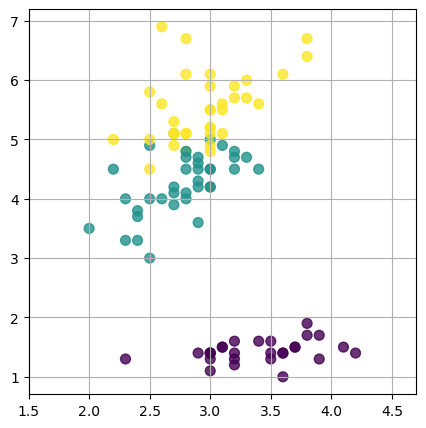

In [30]:
# matplotlib을 통해 해당 자료의 그래프를 그립니다.
plt.figure(figsize=(5,5))
plt.scatter(x=train_x[:, 0], y=train_x[:, 1], s=50, alpha=0.8, c=train_y)
plt.xlim(train_x[:, 0].min() - 0.5, train_x[:, 0].max() + 0.5)
plt.grid()
plt.show()

In [31]:
# 비용함수를 정의합니다.
def mean_squared_error(independent, dependent):
    global weight
    probability = np.dot(independent, weight)
    loss = np.mean((probability - dependent) ** 2)
    print(f"cost: {loss:.3f}")

def mean_absolute_error(independent, dependent):
    global weight
    probability = np.dot(independent, weight)
    loss = np.mean(abs(probability - dependent))
    print(f"cost: {loss:.3f}")

In [29]:
weight = np.random.rand(train_x.shape[1])
lr = 0.001
iterations = 10000

In [32]:
mean_squared_error(test_x, test_y)
mean_absolute_error(test_x, test_y)

cost: 4.083
cost: 2.009


In [33]:
def gradient_descent_rule(x, y, lr):
    global weight
    indications = np.dot(x, weight)
    weight -= (lr / x.shape[0]) * np.dot(x.T, (indications - y))

In [34]:
for epoch in range(iterations):
    gradient_descent_rule(train_x, train_y, lr)
# this train as ordinal linear regression

In [35]:
def pred(x):
    global weight
    if type(x) == list: x = np.array(x)
    return round(np.dot(x, weight))

In [36]:
index = random.randrange(len(test_y))
prediction = pred(test_x[index, :])
print(f"pred: {prediction:.3f}, actual target: {test_y[index]}")

pred: 0.000, actual target: 0


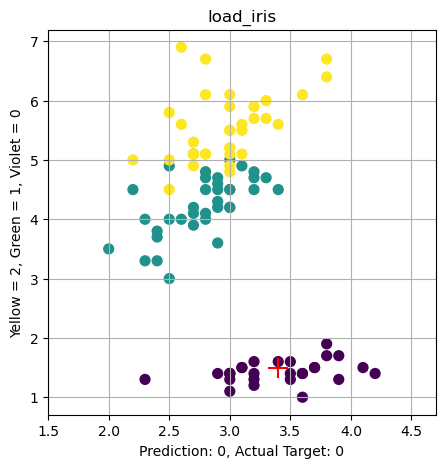

In [37]:
plt.figure(figsize=(5,5))
plt.scatter(x=train_x[:, 0], y=train_x[:, 1], s=50, alpha=1, c=train_y)
plt.scatter(x=test_x[index,0], y=test_x[index,1], c='r', s=200, marker='+')
plt.xlim(train_x[:, 0].min() - 0.5, train_x[:, 0].max() + 0.5)
plt.grid()
plt.xlabel(f"Prediction: {prediction:.0f}, Actual Target: {test_y[index]}")
plt.ylabel("ordinary output: Yellow = 2, Green = 1, Violet = 0")
plt.title("load_iris")
plt.show()

In [38]:
# 비용값을 계산합니다. 앞서서 훈련되기 전의 값들보다 작아져있음을 확인할 수 있습니다. 이는 모델이 학습을 통해 적절히 최적화되었음을 의미합니다.
mean_squared_error(test_x, test_y)
mean_absolute_error(test_x, test_y)

cost: 0.050
cost: 0.177
